<a href="https://colab.research.google.com/github/DnrMartins/Projeto-Alfabetizacao-Mundial-por-Pais/blob/main/Projeto_Alfabetiza%C3%A7%C3%A3o_por_Pais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Projeto Parceria** | Alfabetização Mundial por Pais

Aluno [Denner Martins](https://www.linkedin.com/in/denner-martins-/)

---

# **Tópicos**

<ol type="1">
  <li> Sobre;
  <li>Coleta de Dados;</li>
  <li>Modelagem e Manipulação de Dados;</li>
  <li>Visualização;</li>
  <li>Conclusão;</li>
</ol>

# **Sobre**

Nas últimas décadas, temos assistido a uma transformação significativa nos índices de alfabetização em todo o mundo. A disponibilidade de dados cada vez mais precisos e abrangentes tem nos permitido compreender melhor a dinâmica da alfabetização em escala global.

Um indicador chave nesse sentido é a Taxa de Alfabetização Mundial por País (World Literacy Rate by Country). Esse dado nos fornece um panorama detalhado sobre os níveis de alfabetização em diferentes nações, revelando importantes insights sobre progresso e desafios.

Segundo os últimos dados disponíveis, a taxa global de alfabetização média encontra-se em torno de 86,5%. No entanto, essa métrica esconde importantes diferenças regionais e níveis de desenvolvimento. Enquanto países desenvolvidos atingem taxas acima de 95%, nações em desenvolvimento lutam para superar os 70% de alfabetização.

Fatores como renda per capita, acesso à educação, disparidades de gênero e investimentos em políticas públicas educacionais têm papel fundamental nessa variação. Compreender esses padrões é essencial para direcionar esforços e recursos onde mais são necessários, acelerando o progresso da alfabetização em escala global.

À medida que novos dados são coletados e analisados, nossa compreensão da evolução da alfabetização se torna cada vez mais refinada. Esse conhecimento é crucial para orientar ações eficazes e alcançar a meta de universalização da alfabetização, impactando positivamente o desenvolvimento social e econômico em todo o mundo.

# **Coleta de Dados**

Alfabetização é algo muito importante para todos no mundo, porém, mesmo com essa importância, muitas regiões do mundo enfrentam problemas para garantir uma igualdade no acesso ao ensino.

Nesse projeto vamos usar o conjuto de dados da [World Literacy Rate by Country](https://www.kaggle.com/datasets/dataanalyst001/world-literacy-rate-by-country) que detalha as taxas de alfabetização em diferentes países no mundo.

In [9]:
!wget -q "https://raw.githubusercontent.com/DnrMartins/Projeto-Alfabetizacao-Mundial-por-Pais/main/Literacy%20Rate.csv" -O Literacy.csv

Objetivo desse projeto é mostrar a grande evolução dos dados na alfabetização conforme os anos.

# **Modelagem e Manipulação de Dados**

Para começar, é necessário tratar os dados no arquivo original que está no formato.csv.

In [10]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
literacy_df = pd.read_csv('Literacy.csv')
literacy_df.head()

,S.No,Country,Literacy Rate,Year
0,1,Andorra,1.0,2016.0
1,2,Armenia,1.0,2020.0
2,3,Australia,1.0,2020.0
3,4,Azerbaijan,1.0,2019.0
4,5,Barbados,1.0,2014.0


In [12]:
# Remoção das colunas que não são o foco do projeto

literacy = literacy_df.drop(columns=['S.No'])
literacy.head()

,Country,Literacy Rate,Year
0,Andorra,1.0,2016.0
1,Armenia,1.0,2020.0
2,Australia,1.0,2020.0
3,Azerbaijan,1.0,2019.0
4,Barbados,1.0,2014.0


In [13]:
literacy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        175 non-null    object 
 1   Literacy Rate  175 non-null    float64
 2   Year           174 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.2+ KB


Para termos uma noção melhor da distribuição dos Rating vamos compará-los por visualização de gráficos.

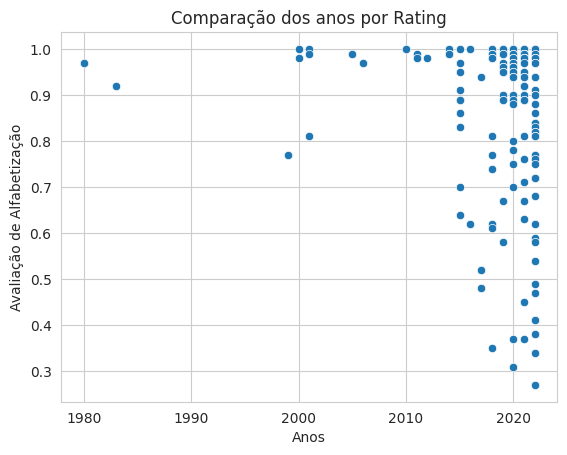

In [16]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(x=literacy['Year'], y=literacy['Literacy Rate'])
  grafico.set(title='Comparação dos anos por Rating', xlabel='Anos', ylabel='Avaliação de Alfabetização');

Como podemos notar tem uma grande evolução das informações dos dados do ano 2000 em frente.

Então, vamos entrar em mais detalhes e atualizar a análise de dados para o Ano de 2020 para verificarmos como estão as avalições da alfabetização no mundo.

In [30]:
# Primeiro vamos tirar as informações de antes de 2020 do nosso Dataframe e transformar nossa coluna 'Year' em números inteiros.

literacy_atualizado = literacy[literacy['Year'] >= 2020]
literacy_atualizado['Year'] = literacy_atualizado['Year'].astype('int64')


<ipython-input-30-0956e4ec0135>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
literacy_atualizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 1 to 174
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        113 non-null    object 
 1   Literacy Rate  113 non-null    float64
 2   Year           113 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5+ KB


In [38]:
literacy_atualizado.head()

,Country,Literacy Rate,Year
1,Armenia,1.0,2020
2,Australia,1.0,2020
6,Canada,1.0,2020
7,Cuba,1.0,2021
8,Estonia,1.0,2021


In [39]:
# Agora vamos atualizar nosso arquivo CSV para melhor .

literacy_atualizado.to_csv('literacy_atualizado.csv')

Mostrando quantos paises tem o Rate (Avaliação) menor que 1.0;

In [41]:
# Filtrando o DataFrame para incluir apenas as linhas com 'Literacy Rate' menor que 1.0
literacy_menor = literacy_atualizado[literacy_atualizado['Literacy Rate'] < 1.0]

# Agrupando o DataFrame filtrado por ano e contando o número de países em cada ano
paises_year = literacy_menor.groupby('Year')['Country'].count()


print(paises_year)

Year
2020    23
2021    32
2022    38
Name: Country, dtype: int64


Mostrando quais são os países que tem o Rate(Avaliação) menor que 1.0;

In [42]:
literacy_atualizado[literacy_atualizado['Literacy Rate'] < 1.0]

,Country,Literacy Rate,Year
30,Albania,0.99,2022
33,Cayman Islands,0.99,2021
34,Croatia,0.99,2021
35,Cyprus,0.99,2021
39,Hungary,0.99,2021
...,...,...,...
169,Afghanistan,0.37,2021
170,Central African Republic,0.37,2020
172,Burkina Faso,0.34,2022
173,Mali,0.31,2020


Porcentagem de Paises com avaliação menor que 1.0

In [46]:
paises_menor_que_um = literacy_atualizado[literacy_atualizado['Literacy Rate'] < 1.0]['Country'].count()

# Calcula a porcentagem
porcentagem = (paises_menor_que_um / literacy_atualizado['Country'].count()) * 100

print(f"A porcentagem de países com Avaliação menor que 1.0 é: {porcentagem:.2f}%")

A porcentagem de países com Avaliação menor que 1.0 é: 82.30%


Porcentagem de paises com avaliação 1.0

In [45]:
# Calculando a quantidade de países com literacy rate 1.0
num_paises_literacy_1 = len(literacy_atualizado[literacy_atualizado['Literacy Rate'] == 1.0])

# Calculando a porcentagem
porcentagem = (num_paises_literacy_1 / len(literacy_atualizado)) * 100

print(f"A porcentagem de paises com Avaliação 1.0 é: {porcentagem:.2f}%")

A porcentagem de paises com Avaliação 1.0 é: 17.70%


Média da Avaliação da Alfabetização por ano;

In [34]:
literacy_atualizado.groupby('Year')['Literacy Rate'].mean()


Year
2020    0.905455
2021    0.909000
2022    0.766750
Name: Literacy Rate, dtype: float64

# **Visualização**

Feita a modelagem de dados podemos visualização melhor as informações.

O gráfico mostra os dados dos anos de 2020, 2021 e 2022.  



In [28]:
import plotly.express as px

fig = px.scatter_geo(literacy_atualizado, locations="Country", locationmode='country names',
                     size="Literacy Rate", color="Literacy Rate",
                     hover_name="Country", animation_frame="Year",
                     projection="natural earth", title="Avaliação da Alfabetização")
fig.show()

# **Conclusão**

Ao analisarmos a trajetória da alfabetização global nas últimas décadas, fica evidente a grande evolução observada entre 2010 e 2020. Nesse período, os avanços na coleta e disponibilidade de dados sobre os níveis de alfabetização em diferentes países permitiram um salto qualitativo em nossa compreensão desse conhecimento. .

Através de pesquisas e levantamentos cada vez mais abrangentes e precisos, pudemos mapear com muito mais detalhes os padrões, tendências e disparidades na alfabetização mundial. Essa riqueza de informações possibilitou o desenvolvimento de políticas públicas e estratégias mais eficazes para acelerar o progresso da alfabetização, especialmente em regiões e países historicamente desfavorecidos.

Os dados revelam que, nessa década, a taxa média global de alfabetização saltou de cerca de 83% para atingir os actuais 86,5%. Avanços significativos foram divulgados em países em desenvolvimento, diminuindo gradativamente conforme lacunas em relação aos países desenvolvidos.

Esse período representou, portanto, um marco importante na evolução da mensuração e compreensão da alfabetização em escala global. Com esses avanços, podemos agora direcionar esforços e recursos de forma mais estratégica, visando atingir a meta de universalização da alfabetização em um futuro próximo